# 4. 다중회귀분석 (Multivariate Regression)
여러 개의 독립 변수가 종속 변수에 영향을 주고 선형 관계를 갖는 경우를 다중회귀분석이라 한다. 앞선 것과 동일한 코드를 우선 작성해보자.

In [3]:
import pandas as pd # 데이터 처리에 필요한 라이브러리
import numpy as np # 행렬, 수학적 연산 모음 라이브러리
import matplotlib.pyplot as plt # 메트랩의 그래프 그리는 것을 가져오는 라이브러리
import seaborn as sns # 뭔지 모름, 근데 그래프 그리는 더 나은 방법인거 같음

df = pd.read_csv('./auto-mpg.csv', header=None)

df.columns = ['mpg','cylinders','displacement','horsepower','weight'
             ,'acceleration','model year','origin','name']

df['horsepower'].replace('?',np.nan, inplace=True)
df.dropna(subset=['horsepower'], axis=0, inplace=True)
df['horespower'] = df['horsepower'].astype('float') # horsepower의 데이터 타입을 float으로 바꿈

ndf = df[['mpg','cylinders','horsepower','weight']] # 네개의 columns를 뽑하서 새로운 ndf를 만듦
ndf

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504.0
1,15.0,8,165.0,3693.0
2,18.0,8,150.0,3436.0
3,16.0,8,150.0,3433.0
4,17.0,8,140.0,3449.0
...,...,...,...,...
393,27.0,4,86.00,2790.0
394,44.0,4,52.00,2130.0
395,32.0,4,84.00,2295.0
396,28.0,4,79.00,2625.0


아래와 같이 X값에는 독립변수 3개를 넣고 data를 구분해 주자.

In [4]:
X=ndf[['cylinders','horsepower','weight']] # 독립변수
y=ndf[['mpg']] # 종속 변수

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
# train_test_split 함수를 사용하면 자동으로 train과 test를 나눠준다.

print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape)

훈련 데이터:  (274, 3)
검증 데이터:  (118, 3)


이 후에는 LinearRegression() 함수를 사용하여 회귀분석 모형 객체를 생성하고 앞에서 진행한 부분과 동일하게 진행한다.

In [6]:
from sklearn.linear_model import LinearRegression # 선형 회귀분석 모듈
lr = LinearRegression() # 단순 선형 회귀분석
lr.fit(X_train, y_train) # train data를 fit 함수를 이용해서 학습한다.

r_square = lr.score(X_test, y_test)
print(r_square) # 결정 계수

0.6939048496695597


In [7]:
print('X 변수의 계수 a: ', lr.coef_) # x변수의 계수를 불러오는 함수

X 변수의 계수 a:  [[-0.60691288 -0.03714088 -0.00522268]]


In [8]:
print('상수항 b', lr.intercept_)

상수항 b [46.41435127]


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


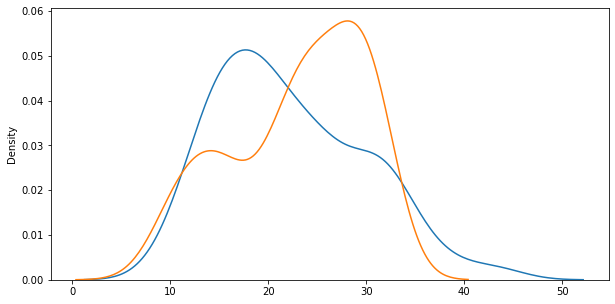

<Figure size 432x288 with 0 Axes>

In [12]:
y_hat = lr.predict(X_test)
plt.figure(figsize=(10,5))
ax1 = sns.distplot(y_test, hist=False, label="y_test")
ax2 = sns.distplot(y_hat, hist=False, label="y_hat", ax=ax1)
plt.show()
plt.savefig('dotplot.png')

그래프를 보면 한쪽으로 편향되는 경향은 그대로 남아 있지만 그래프의 첨도(뾰족한 정도)가 약간 누그러진 것을 볼 수 있다.

왜 인지 모르겠지만 그래프가 저장이 안된다. 아마 계속 warning 뜨는 distplot 때문인것도 같은데  
일단 원본 그래프는  
02.Simple Linear Regression 에서 맨 마지막에 있다.  
위의 설명처럼 편향되는 것은 똑같으나 첨도가 다르게 나타난다.